In [ ]:
!pip install -U ydata-profiling[notebook]

In [ ]:
import shutil

shutil.unpack_archive("/content/archive (15).zip")

In [ ]:
import pandas as pd

data = pd.read_csv("/content/SKAB/valve1/0.csv", delimiter=";")

In [ ]:
data.head()

datetime  Accelerometer1RMS  Accelerometer2RMS  Current  \
0  2020-03-09 10:14:33           0.026588           0.040111  1.33020   
1  2020-03-09 10:14:34           0.026170           0.040452  1.35399   
2  2020-03-09 10:14:35           0.026199           0.039419  1.54006   
3  2020-03-09 10:14:36           0.026027           0.039641  1.33458   
4  2020-03-09 10:14:37           0.026290           0.040273  1.07851   

   Pressure  Temperature  Thermocouple  Voltage  Volume Flow RateRMS  anomaly  \
0  0.054711      79.3366       26.0199  233.062                 32.0      0.0   
1  0.382638      79.5158       26.0258  236.040                 32.0      0.0   
2  0.710565      79.3756       26.0265  251.380                 32.0      0.0   
3  0.382638      79.6097       26.0393  234.392                 32.0      0.0   
4 -0.273216      79.6109       26.0420  225.342                 32.0      0.0   

   changepoint  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1148 non-null   object 
 1   Accelerometer1RMS    1148 non-null   float64
 2   Accelerometer2RMS    1148 non-null   float64
 3   Current              1148 non-null   float64
 4   Pressure             1148 non-null   float64
 5   Temperature          1148 non-null   float64
 6   Thermocouple         1148 non-null   float64
 7   Voltage              1148 non-null   float64
 8   Volume Flow RateRMS  1148 non-null   float64
 9   anomaly              1148 non-null   float64
 10  changepoint          1148 non-null   float64
dtypes: float64(10), object(1)
memory usage: 98.8+ KB


In [ ]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1148 non-null   datetime64[ns]
 1   Accelerometer1RMS    1148 non-null   float64       
 2   Accelerometer2RMS    1148 non-null   float64       
 3   Current              1148 non-null   float64       
 4   Pressure             1148 non-null   float64       
 5   Temperature          1148 non-null   float64       
 6   Thermocouple         1148 non-null   float64       
 7   Voltage              1148 non-null   float64       
 8   Volume Flow RateRMS  1148 non-null   float64       
 9   anomaly              1148 non-null   float64       
 10  changepoint          1148 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 98.8 KB


In [ ]:
data.describe()

datetime  Accelerometer1RMS  Accelerometer2RMS  \
count                           1148        1148.000000        1148.000000   
mean   2020-03-09 10:24:32.795296256           0.026521           0.040173   
min              2020-03-09 10:14:33           0.025553           0.038072   
25%    2020-03-09 10:19:32.750000128           0.026293           0.039631   
50%       2020-03-09 10:24:32.500000           0.026521           0.040172   
75%    2020-03-09 10:29:33.249999872           0.026742           0.040697   
max              2020-03-09 10:34:32           0.027489           0.043046   
std                              NaN           0.000329           0.000773   

           Current     Pressure  Temperature  Thermocouple      Voltage  \
count  1148.000000  1148.000000  1148.000000   1148.000000  1148.000000   
mean      1.409799     0.084133    77.437466     25.958166   230.322345   
min       0.388229    -0.601143    74.237000     25.829900     1.087350   
25%       0.794239     0.054711    75.663450     25.878800   225.265500   
50%       1.035150     0.054711    78.384500     25.954700   231.315500   
75%       1.222870     0.382638    78.917275     26.020100   237.097250   
max     235.511000     0.710565    79.889100     26.104400   255.324000   
std       9.712153     0.249460     1.745231      0.078422    15.910242   

       Volume Flow RateRMS      anomaly  changepoint  
count          1148.000000  1148.000000  1148.000000  
mean             32.021791     0.349303     0.003484  
min              31.000000     0.000000     0.000000  
25%              32.000000     0.000000     0.000000  
50%              32.000000     0.000000     0.000000  
75%              32.000000     1.000000     0.000000  
max              32.998600     1.000000     1.000000  
std               0.458517     0.476958     0.058951

In [ ]:
data.isna().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Sensor Dataset")

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 44.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

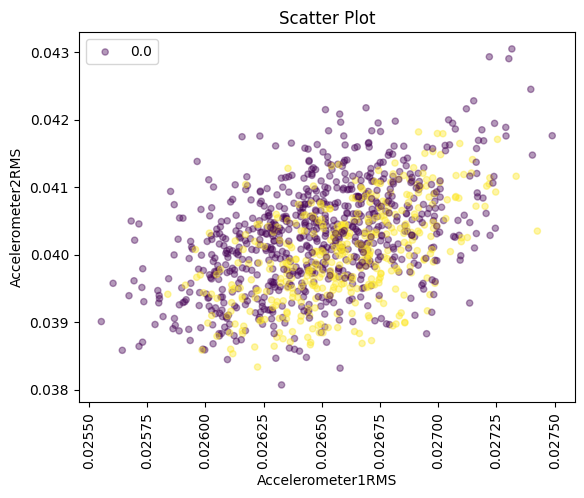

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Accelerometer1RMS'], data['Accelerometer2RMS'], c=data['anomaly'], s=20, alpha=0.4)
plt.xlabel("Accelerometer1RMS")
plt.xticks(rotation=90)
plt.ylabel("Accelerometer2RMS")
plt.title("Scatter Plot")
plt.legend(data['anomaly'])
plt.show()

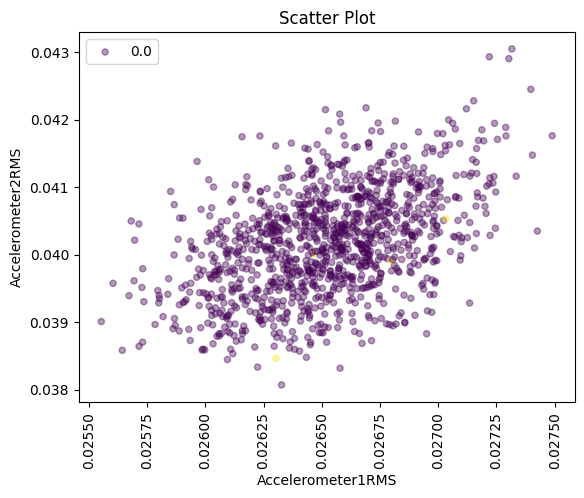

In [ ]:
plt.scatter(data['Accelerometer1RMS'], data['Accelerometer2RMS'], c=data['changepoint'], s=20, alpha=0.4)
plt.xlabel("Accelerometer1RMS")
plt.xticks(rotation=90)
plt.ylabel("Accelerometer2RMS")
plt.title("Scatter Plot")
plt.legend(data['changepoint'])
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="datetime", y="Temperature", color="changepoint", opacity=0.6)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [ ]:
data[data["changepoint"]==1]

datetime  Accelerometer1RMS  Accelerometer2RMS   Current  \
574 2020-03-09 10:24:33           0.027033           0.040534  0.839896   
631 2020-03-09 10:25:33           0.026466           0.040014  1.289650   
918 2020-03-09 10:30:33           0.026797           0.039910  1.077300   
975 2020-03-09 10:31:33           0.026303           0.038467  1.059190   

     Pressure  Temperature  Thermocouple  Voltage  Volume Flow RateRMS  \
574  0.382638      78.6736       25.9506  219.573              32.0000   
631 -0.273216      77.6439       25.9553  235.737              32.0000   
918  0.054711      76.0651       25.8531  229.048              31.9981   
975 -0.273216      76.2299       25.8788  210.918              31.0020   

     anomaly  changepoint  
574      1.0          1.0  
631      1.0          1.0  
918      1.0          1.0  
975      0.0          1.0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data[["Accelerometer1RMS", "Accelerometer2RMS"]], data["changepoint"], test_size=0.1)

In [ ]:
Y_train.nunique()

2

In [ ]:
Y_test.nunique()

2

In [ ]:
from collections import Counter

class_counts = Counter(Y_train)

In [ ]:
class_counts.items()

dict_items([(0.0, 1030), (1.0, 3)])

In [ ]:
one_class_svm = OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [ ]:
prediction = one_class_svm.predict(X_test)

In [ ]:
prediction

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
prediction = [1 if i==-1 else 0 for i in prediction]

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       114
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98       115
   macro avg       0.50      0.50      0.50       115
weighted avg       0.98      0.98      0.98       115



In [ ]:
x_test = X_test.copy()
y_test = Y_test.copy()
df_test = pd.DataFrame(x_test[["Accelerometer1RMS", "Accelerometer2RMS"]])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction

In [ ]:
df_test

Accelerometer1RMS  Accelerometer2RMS  y_test  one_class_svm_prediction
1070           0.026971           0.041038     0.0                         0
907            0.026586           0.039562     0.0                         0
1101           0.026887           0.040289     0.0                         0
981            0.026669           0.040147     0.0                         0
424            0.026269           0.039181     0.0                         0
...                 ...                ...     ...                       ...
387            0.026812           0.039839     0.0                         0
552            0.026289           0.039148     0.0                         0
908            0.026703           0.040151     0.0                         0
355            0.026857           0.040347     0.0                         0
912            0.027142           0.041209     0.0                         0

[115 rows x 4 columns]

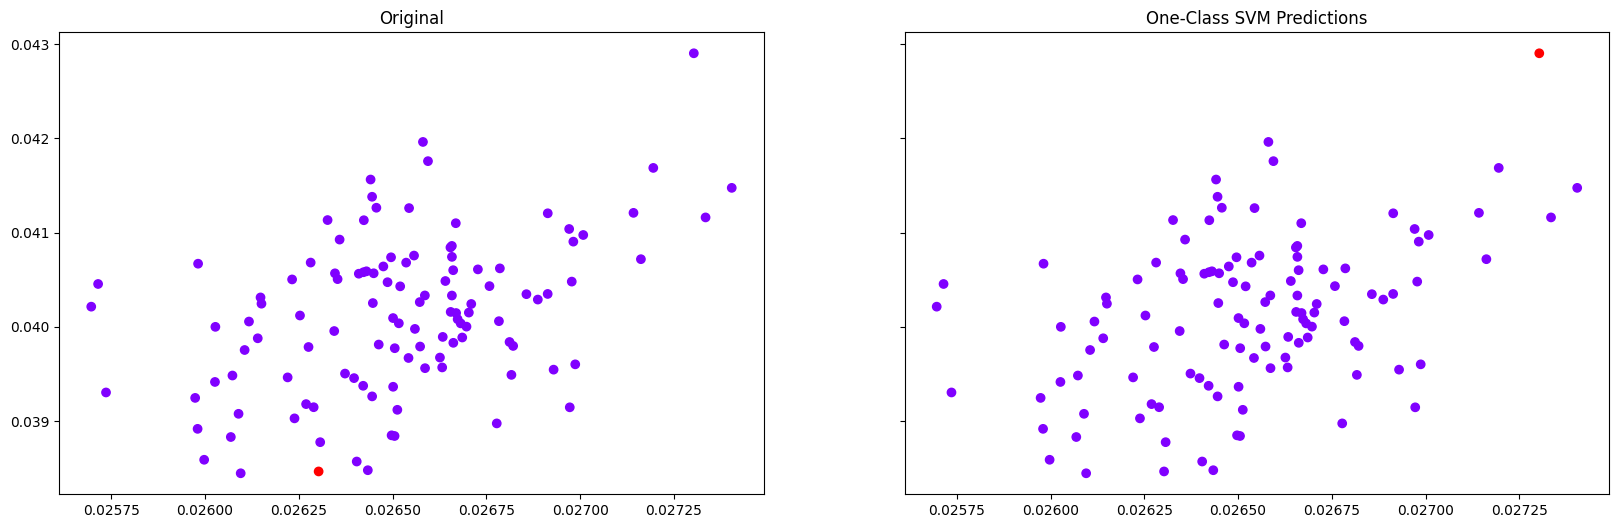

In [ ]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))

#Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Accelerometer1RMS'], df_test['Accelerometer2RMS'], c=df_test['y_test'], cmap='rainbow')

#One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Accelerometer1RMS'], df_test['Accelerometer2RMS'], c=df_test['one_class_svm_prediction'], cmap='rainbow')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

1